# Lecture 8

Group, Join, Conditionals, and Iteration

# Announcements

- The project is due on Sunday evening.
- That's less than a week!
- No homework this week (due to project)
- But there is a lab due tomorrow!

# Grouping

Classifying variables

In [1]:
#: imports!

import numpy as np
from datascience import *

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Grouping consists of Split - Apply - Combine

![grouping_workflow.png](./grouping_workflow.png)

## Our familiar NBA data...

In [2]:
#: read from csv and relabel
nba = Table.read_table('nba_salaries.csv').relabeled("'15-'16 SALARY", 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


## How big is each team?

- We know how to do this: `.group()`.
- Can visualize distribution of team sizes with `.hist()`.

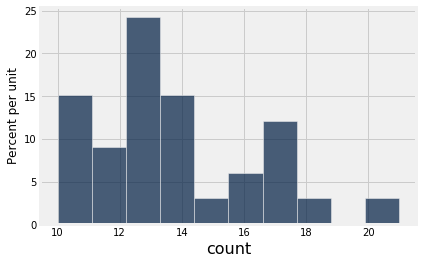

In [3]:
nba.group('TEAM').hist('count')

## How much does each team pay in payroll?

- Instead of counting, we want to sum the `SALARY` column.

In [4]:
nba.group('TEAM', np.sum)

TEAM,PLAYER sum,POSITION sum,SALARY sum
Atlanta Hawks,,,69.5731
Boston Celtics,,,50.2855
Brooklyn Nets,,,57.307
Charlotte Hornets,,,84.1024
Chicago Bulls,,,78.8209
Cleveland Cavaliers,,,102.312
Dallas Mavericks,,,65.7626
Denver Nuggets,,,62.4294
Detroit Pistons,,,42.2118
Golden State Warriors,,,94.0851


## What happened with the columns?

In [5]:
#: check it out...
nba.group('TEAM', np.sum)

TEAM,PLAYER sum,POSITION sum,SALARY sum
Atlanta Hawks,,,69.5731
Boston Celtics,,,50.2855
Brooklyn Nets,,,57.307
Charlotte Hornets,,,84.1024
Chicago Bulls,,,78.8209
Cleveland Cavaliers,,,102.312
Dallas Mavericks,,,65.7626
Denver Nuggets,,,62.4294
Detroit Pistons,,,42.2118
Golden State Warriors,,,94.0851


- `np.sum` is applied to all columns (besides `TEAM`)
- But we can't sum all columns. E.g., `PLAYER`.
- In those cases: empty column.

## Which position has the highest average salary?

- We need to group by position.
- Within each group, find the average.
- Then sort by average salary.

In [6]:
nba.group('POSITION', np.mean).sort('SALARY mean', descending=True)

POSITION,PLAYER mean,TEAM mean,SALARY mean
C,,,6.08291
SF,,,5.53267
PG,,,5.16549
PF,,,4.95134
SG,,,3.9882


## What is the max salary of each position?

- Group by position.
- Within each group, use `max`.

In [7]:
#: like so...
nba.group('POSITION', max)

POSITION,PLAYER max,TEAM max,SALARY max
C,Zaza Pachulia,Washington Wizards,22.3594
PF,Zach Randolph,Washington Wizards,22.1927
PG,Zach LaVine,Washington Wizards,21.4687
SF,Wilson Chandler,Washington Wizards,25
SG,Zoran Dragic,Washington Wizards,20


## Discussion question

Does Zaza Pachulia make 22.3594 million per year?

1. Yes
2. No
3. I cannot tell from this table.

In [8]:
#: ...
nba.group('POSITION', max)

POSITION,PLAYER max,TEAM max,SALARY max
C,Zaza Pachulia,Washington Wizards,22.3594
PF,Zach Randolph,Washington Wizards,22.1927
PG,Zach LaVine,Washington Wizards,21.4687
SF,Wilson Chandler,Washington Wizards,25
SG,Zoran Dragic,Washington Wizards,20


## How does `.group()` work?

In [16]:
#: prints what it is given
def our_aggregator(group):
    print('I was given', group)
    # try len, sum, list...
    return list(group)

In [26]:
#: select 5 random Cs and PFs
subset = nba.where('POSITION', are.contained_in(['C', 'PF'])).sample(6)
subset

PLAYER,POSITION,TEAM,SALARY
Tristan Thompson,C,Cleveland Cavaliers,14.2609
LaMarcus Aldridge,PF,San Antonio Spurs,19.689
Jarell Martin,PF,Memphis Grizzlies,1.23084
Drew Gooden,PF,Washington Wizards,3.3
Lucas Nogueira,C,Toronto Raptors,1.842
LaMarcus Aldridge,PF,San Antonio Spurs,19.689


In [28]:
subset.group('POSITION', our_aggregator)

I was given ['Tristan Thompson' 'Lucas Nogueira']
I was given ['LaMarcus Aldridge' 'Jarell Martin' 'Drew Gooden' 'LaMarcus Aldridge']
I was given ['Cleveland Cavaliers' 'Toronto Raptors']
I was given ['San Antonio Spurs' 'Memphis Grizzlies' 'Washington Wizards'
 'San Antonio Spurs']
I was given [14.26087  1.842  ]
I was given [19.689    1.23084  3.3     19.689  ]


POSITION,PLAYER our_aggregator,TEAM our_aggregator,SALARY our_aggregator
C,"['Tristan Thompson', 'Lucas Nogueira']","['Cleveland Cavaliers', 'Toronto Raptors']","[14.26087, 1.842]"
PF,"['LaMarcus Aldridge', 'Jarell Martin', 'Drew Gooden', 'L ...","['San Antonio Spurs', 'Memphis Grizzlies', 'Washington W ...","[19.689, 1.23084, 3.3, 19.689]"


## For each position, which team has the most players at that position?

- We want to count...
- but sizes of groups within groups.
- i.e., sizes of position groups within teams.

In [34]:
nba.group(['TEAM', 'POSITION']).sort('count', descending=True).sort('POSITION', distinct=True)

TEAM,POSITION,count
Denver Nuggets,C,4
Memphis Grizzlies,PF,7
Utah Jazz,PG,5
Washington Wizards,SF,4
Phoenix Suns,SG,6


## What are the number of players at each position on *every* team?

In [35]:
nba.group(['TEAM', 'POSITION'])

TEAM,POSITION,count
Atlanta Hawks,C,3
Atlanta Hawks,PF,2
Atlanta Hawks,PG,2
Atlanta Hawks,SF,2
Atlanta Hawks,SG,5
Boston Celtics,C,3
Boston Celtics,PF,2
Boston Celtics,PG,4
Boston Celtics,SF,2
Boston Celtics,SG,4


## A better approach: `.pivot()`:

In [109]:
nba.pivot('POSITION', 'TEAM')

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,3,2,2,2,5
Boston Celtics,3,2,4,2,4
Brooklyn Nets,1,3,2,2,5
Charlotte Hornets,3,3,4,2,6
Chicago Bulls,2,2,2,2,4
Cleveland Cavaliers,4,1,3,1,1
Dallas Mavericks,2,2,4,1,2
Denver Nuggets,4,2,2,4,2
Detroit Pistons,3,0,1,4,2
Golden State Warriors,3,3,2,4,2


## `.pivot()` can do more than count...

- What is the *average* salary of each position on every team?

In [113]:
nba.pivot('POSITION', 'TEAM', 'SALARY', np.mean)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,7.58542,11.0025,4.8817,3,1.80969
Boston Celtics,2.45046,3.08548,4.97465,4.41716,2.00755
Brooklyn Nets,1.3629,4.45251,3.9,13.0403,1.74118
Charlotte Hornets,6.77224,4.68577,4.4853,3.76642,4.04238
Chicago Bulls,10.4244,3.46744,11.1715,1.95816,6.19447
Cleveland Cavaliers,7.75234,19.689,6.55159,22.9705,8.98876
Dallas Mavericks,3.23548,11.9135,4.41818,15.3615,1.21517
Denver Nuggets,2.6163,7.02498,3.72362,7.19577,0.841949
Detroit Pistons,4.0907,0,13.913,1.71622,4.58088
Golden State Warriors,6.54125,7.18637,8.45726,4.49669,9.0005


# Join

Combining columns from two different tables

## Example

In [37]:
#: table of products
products = Table(['Location', 'Product', 'Price']).with_rows([
    ['Cups', 'Green Tea', 1.25],
    ['Cups', 'Latte', 2.50],
    ['Cups', 'Drip Coffee', 1.00],
    ['Art of Espresso', 'Espresso', 2.00],
    ['Art of Espresso', 'Latte', 3.00],
    ['Perks', 'Drip Coffee', 1.25],
    ['Perks', 'Green Tea', 1.50]
])
products

Location,Product,Price
Cups,Green Tea,1.25
Cups,Latte,2.5
Cups,Drip Coffee,1
Art of Espresso,Espresso,2
Art of Espresso,Latte,3
Perks,Drip Coffee,1.25
Perks,Green Tea,1.5


## Example

In [40]:
#: table of coupons
coupons = Table(['Location', 'Discount']).with_rows([
    ['Cups', .25],
    ['Art of Espresso', .10]
])
coupons

Location,Discount
Cups,0.25
Art of Espresso,0.1


## How do we calculate discounted price of each product?

- Idea: "cross-reference" tables.
- I.e., for each row in `products`, find discount in `coupons` for that row's `Location`.
- This is what `.join()` does:

In [41]:
discounted = products.join('Location', coupons)
discounted

Location,Product,Price,Discount
Art of Espresso,Espresso,2,0.1
Art of Espresso,Latte,3,0.1
Cups,Green Tea,1.25,0.25
Cups,Latte,2.5,0.25
Cups,Drip Coffee,1,0.25


In [42]:
discounted.with_column(
    'Discounted Price',
    np.round(discounted.column('Price') * (1 - discounted.column('Discount')), 2)
)

Location,Product,Price,Discount,Discounted Price
Art of Espresso,Espresso,2,0.1,1.8
Art of Espresso,Latte,3,0.1,2.7
Cups,Green Tea,1.25,0.25,0.94
Cups,Latte,2.5,0.25,1.88
Cups,Drip Coffee,1,0.25,0.75


## The `.join()` method:

- `this_table.join(common_column, that_table)`
- Only contains rows with values of `common_column` which appear in *both* tables.
    - For example, Perks was omitted.
- What if the "common columns" have different names?
- `this_table.join(this_column, that_table, that_column)`

## Example

In [43]:
cafes = coupons.relabeled('Location', 'Cafe')
cafes

Cafe,Discount
Cups,0.25
Art of Espresso,0.1


In [44]:
products.join('Location', cafes, 'Cafe')

Location,Product,Price,Discount
Art of Espresso,Espresso,2,0.1
Art of Espresso,Latte,3,0.1
Cups,Green Tea,1.25,0.25
Cups,Latte,2.5,0.25
Cups,Drip Coffee,1,0.25


# Booleans and Conditionals

## Booleans

- A **Boolean** variable is either true or false.
    - yes or no
    - on or off
    - 0 or 1
- Named after George Boole.
- In Python: 
    - we have the `bool` type, `True` and `False` literals.
    - `and`, `or`, `not` operators.

In [45]:
x = True

In [46]:
type(x)

bool

## The `not` operator

- Flips a `True` to a `False`, and a `False` to a `True`.

In [50]:
#: ...
is_sunny = True

not is_sunny

False

## The `and` operator

- Placed between two `bool`s.
- `True` if *both* are true, otherwise `False`.

In [53]:
#: ...
is_sunny = True
is_warm = False

is_sunny and is_warm

False

## The `or` operator

- Placed between two `bool`s.
- `True` if at least one of them is `True`, otherwise `False`.

In [52]:
#: ...
is_sunny = True
is_warm = False

is_sunny or is_warm

True

## Building expressions

- We can chain together longer expressions.
- Parsed from left to right.
- But use parenthesis to make things clearer.

In [54]:
#: ...
is_sunny = True
is_warm = False
is_humid = True

is_humid and not is_sunny or is_warm

False

## Discussion question

    a = True
    b = True
    not(((not a) and b) or ((not b) or a))
    
What does the expression evaluate to?

- A) `True`
- B) `False`
- C) 32.7

In [55]:
#: let's see...
a = True
b = True
not(((not a) and b) or ((not b) or a))

False

## Comparisons

- Comparisons produce `bool`s:

In [56]:
4 > 2

True

## Comparison operators

Operator | Description
-------------| ----------
`>` | greater than
`>=` | greater than or equal to
`<` | less than
`<=` | less than or equal to
`==` | equals
`!=` | not equals

## Careful!

- Note that there's a difference between `=` and `==`.
- Using the wrong one can result in a `SyntaxError`.

In [57]:
3 = 5

SyntaxError: can't assign to literal (<ipython-input-57-19d406bf21fe>, line 1)

## Conditionals

- Do something if an expression is `True`.
- Syntax (don't forget the colon):


    if <condition>:
        <body>
            
- Indentation matters!

In [58]:
#: in San Diego
is_sunny = True

if is_sunny:
    print('Wear sunglasses!')

Wear sunglasses!


## Conditionals

- `else`: do something else if condition is `False`

In [59]:
#: in San Diego
is_sunny = False

if is_sunny:
    print('Wear sunglasses')
else:
    print('Stay inside')

Stay inside


## Conditionals

- `elif`: If condition is `False`, check another condition
- "Falls through" until first `True` condition.
- But doesn't continue after that.
- "Catch" everything that falls through with `else`

In [60]:
#: in San Diego
is_raining = False
is_warm = True
is_sunny = True

if is_raining:
    print('Go outside')
elif is_warm:
    print('Wear shorts')
elif is_sunny:
    print('Wear sunglasses')
else:
    print('All conditions false!')

Wear shorts


## Example: sign function

Write a function that takes a single number and prints "positive" if it is a positive number and "negative" if it is a negative number.

In [61]:
def sign(x):
    if x > 0:
        print('positive')
    elif x < 0:
        print('negative')
    else:
        print('neither!')

In [62]:
sign(7)

positive


In [63]:
sign(-2)

negative


In [64]:
sign(0)

neither!


## Example: the other one

- Develop a function which takes a 2-element array and a value.
- If the value is:
    - the first element, return the second.
    - the second element, return the first.
    
    
    >>> choices = make_array('moon', 'sun')
    >>> other_one(choices, 'moon')
    sun
    >>> other_one(choices, 'sun')
    moon

In [65]:
def other_one(arr, value):
    if value == arr.item(0):
        return arr.item(1)
    elif value == arr.item(1):
        return arr.item(0)
    else:
        print('Invalid input!')

## Discussion question

```
def func(a, b):
    if (a + b > 4 and b > 0):
        return 'foo'
    elif (a*b >= 4 or b < 0):
        return 'bar'
    else:
        return 'baz'
```

What is returned when `func(2, 2)` is called?

- A) foo
- B) bar
- C) baz
- D) more than one of the above

## Using parenthesis...

Instead of:

    if (a + b > 4 and b > 0):
        ...

You might prefer: 

    if (a + b > 4) and (b > 0):
        ...
        
They do the same thing, because comparison operators are evaluated first.

Fun fact: if `a = 2`, and `b = 2`, `a + b > (4 and b) > 0` evaluates to `True`.

# Iteration

We can use Python to help automate our job at NASA:

In [66]:
#: counting down...
import time

print("Launching in...")
print("t-minus", 10)
time.sleep(1)
print("t-minus", 9)
time.sleep(1)
print("t-minus", 8)
time.sleep(1)
print("t-minus", 7)
time.sleep(1)
print("t-minus", 6)
time.sleep(1)
print("t-minus", 5)
time.sleep(1)
print("t-minus", 4)
time.sleep(1)
print("t-minus", 3)
time.sleep(1)
print("t-minus", 2)
time.sleep(1)
print("t-minus", 1)
time.sleep(1)
print("Blast off!")

Launching in...
t-minus 10
t-minus 9
t-minus 8
t-minus 7
t-minus 6
t-minus 5
t-minus 4
t-minus 3
t-minus 2
t-minus 1
Blast off!


## Better approach: use a `for`-loop.

In [67]:
print("Launching in...")

for t in [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]:
    print("t-minus", t)
    time.sleep(1)
    
print("Blast off!")

Launching in...
t-minus 10
t-minus 9
t-minus 8
t-minus 7
t-minus 6
t-minus 5
t-minus 4
t-minus 3
t-minus 2
t-minus 1
Blast off!


## `for`-loops

- Do something for every value in a sequence
- Syntax (don't forget the colon):

```
for <loop variable> in <sequence>:
    <body>
```

- Indentation matters!


In [68]:
#: loop variable can be anything
for x in [1, 2, 3, 4]:
    print(x ** 2)

1
4
9
16


## Ranges

- We can use `np.arange` to create sequences to iterate over:

In [69]:
#: count to 9, starting from 0
for x in np.arange(10):
    print(x)

0
1
2
3
4
5
6
7
8
9


In [71]:
#: countdown
for x in np.arange(10, 0, -1):
    print(x)

10
9
8
7
6
5
4
3
2
1


## Iterating over array by indexing

In [72]:
#: use np.arange(size)

flavors = make_array('Chocolate', 'Vanilla', 'Strawberry')

for index in np.arange(flavors.size):
    print('Flavor number', index, 'is', flavors.item(index))

Flavor number 0 is Chocolate
Flavor number 1 is Vanilla
Flavor number 2 is Strawberry


In [73]:
# using enumerate()
for index, flavor in enumerate(flavors):
    print('Flavor number', index, 'is', flavor)

Flavor number 0 is Chocolate
Flavor number 1 is Vanilla
Flavor number 2 is Strawberry


## Building an array by iterating

- How many letters are in each name?
- We want to save our results!
- Use `np.append`: appends an element to end of array.

In [77]:
#: names
names = ['Winona', 'Xanthippe', 'Yvonne', 'Zelda']

lengths = make_array()

for name in names:
    lengths = np.append(lengths, len(name))
    
lengths

array([6., 9., 6., 5.])